In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
import os
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
path = 'D:/Kaggle/GTSRB'
train_path = path+'/'+'Train'
test_path = path+'/'+'Test'
trainfolders = os.listdir(train_path)

In [8]:
import pandas as pd
train_df = pd.read_csv(path+'/Train.csv',header = 0)
train_df.head()
train_df = train_df.drop(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 
                          'Roi.Y2'], axis = 1)
train_df.head()

filenames = [path+'/'+fname for fname in train_df['Path']]
filenames[:5]

images=[]
for file in filenames:
    img = Image.open(file)
    img = img.resize((64,64))
    if img is not None:
        images.append(np.asarray(img)/256.0) #Divide by 64 to make the input pixels between 0,1

In [19]:
images[:5]

[array([[[0.1796875 , 0.19921875, 0.21875   ],
         [0.1796875 , 0.19921875, 0.21875   ],
         [0.18359375, 0.19921875, 0.21875   ],
         ...,
         [0.1875    , 0.1953125 , 0.1953125 ],
         [0.1796875 , 0.19140625, 0.19140625],
         [0.1796875 , 0.19140625, 0.19140625]],
 
        [[0.1796875 , 0.19921875, 0.21875   ],
         [0.1796875 , 0.19921875, 0.21875   ],
         [0.18359375, 0.19921875, 0.21875   ],
         ...,
         [0.1875    , 0.1953125 , 0.1953125 ],
         [0.1796875 , 0.19140625, 0.19140625],
         [0.1796875 , 0.19140625, 0.19140625]],
 
        [[0.1796875 , 0.19921875, 0.21875   ],
         [0.1796875 , 0.19921875, 0.21875   ],
         [0.18359375, 0.19921875, 0.21875   ],
         ...,
         [0.1953125 , 0.203125  , 0.19921875],
         [0.1796875 , 0.1953125 , 0.19140625],
         [0.17578125, 0.19140625, 0.19140625]],
 
        ...,
 
        [[0.1953125 , 0.20703125, 0.21484375],
         [0.1953125 , 0.20703125, 0.21875

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(images,train_df['ClassId'],
                                                    test_size = 0.2, 
                                                    random_state = 123)

from keras.utils import to_categorical
encoded_Ytrain = to_categorical(Y_train)
encoded_Yval = to_categorical(Y_val)

In [26]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[64, 64,3]),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    # tf.keras.layers.Dropout(0.4),
#                                     tf.keras.layers.Dense(256),
                                    tf.keras.layers.Dense(128),
                                    tf.keras.layers.Dense(64),
#                                     tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(43, activation = 'softmax')
                                    ])

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                                  label_smoothing=0,
                                                  reduction="auto",
                                                  name="categorical_crossentropy")

model.compile(optimizer='adam', loss=loss_fn, metrics = ['categorical_accuracy'])

history = model.fit(np.asarray(X_train),encoded_Ytrain,validation_data = (np.asarray(X_val),encoded_Yval),
                    epochs=120, verbose=1,batch_size=64)

Epoch 1/120
491/491 [==============================] - 76s 151ms/step - loss: 2.9691 - categorical_accuracy: 0.2357 - val_loss: 1.6591 - val_categorical_accuracy: 0.5173
Epoch 2/120
491/491 [==============================] - 70s 142ms/step - loss: 1.4077 - categorical_accuracy: 0.5886 - val_loss: 1.2988 - val_categorical_accuracy: 0.6205
Epoch 3/120
491/491 [==============================] - 68s 139ms/step - loss: 1.0934 - categorical_accuracy: 0.6826 - val_loss: 0.7893 - val_categorical_accuracy: 0.7796
Epoch 4/120
491/491 [==============================] - 70s 142ms/step - loss: 0.9253 - categorical_accuracy: 0.7402 - val_loss: 0.7826 - val_categorical_accuracy: 0.7853
Epoch 5/120
491/491 [==============================] - 67s 137ms/step - loss: 0.8593 - categorical_accuracy: 0.7612 - val_loss: 1.4427 - val_categorical_accuracy: 0.6285
Epoch 6/120
491/491 [==============================] - 64s 131ms/step - loss: 0.8246 - categorical_accuracy: 0.7824 - val_loss: 0.6624 - val_categoric

In [27]:
model.evaluate(np.asarray(X_val),  encoded_Yval, verbose=2)
Y_pred = np.argmax(model.predict(np.asarray(X_val)),axis=-1)

246/246 - 13s - loss: 0.4415 - categorical_accuracy: 0.9002


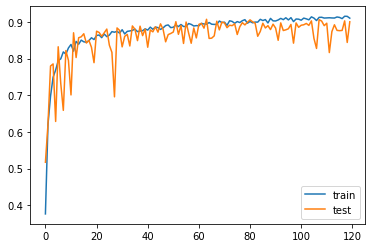

In [28]:
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.show()

In [10]:
#Scoring on independent test data
test_df = pd.read_csv(path+'/Test.csv',header = 0)
test_df.head()
test_df = test_df.drop(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2'], axis = 1)
test_df.head()

filenames = [path+'/'+fname for fname in test_df['Path']]
filenames[:5]

images_test=[]
for file in filenames:
    img = Image.open(file)
    img = img.resize((64,64))
    if img is not None:
        images_test.append(np.asarray(img)/256.0) #Divide by 256 to make the input pixels between 0,1

In [ ]:
# X_train = np.asarray(images)
# Y_train = train_df['ClassId']
X_test = np.asarray(images_test)
Y_test = test_df['ClassId']
encoded_Ytest = to_categorical(Y_test)
model.evaluate(X_test,  encoded_Ytest, verbose=2)
Y_pred_test = np.argmax(model.predict(X_test),axis=-1)

In [11]:
X_train = np.asarray(X_train)
X_val = np.asarray(X_val)
# Y_train = train_df['ClassId']
X_test = np.asarray(images_test)
Y_test = test_df['ClassId']

In [12]:
encoded_Ytest = to_categorical(Y_test)

In [13]:
#Import libraries
from keras.utils import np_utils
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import kerastuner as kt

In [14]:
print("Train shape = ",X_train.shape)
print("Validation shape = ", X_val.shape)
print("Test shape = ", X_test.shape)

Train shape =  (31367, 64, 64, 3)
Validation shape =  (7842, 64, 64, 3)
Test shape =  (12630, 64, 64, 3)


In [24]:
#Define model
def create_model(hyperparam):
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=[64, 64,3]))
    model.add(layers.Dense(hyperparam.Int('hidden_size1',
                                          min_value = 64, max_value = 384, step = 64), 
                           activation = hyperparam.Choice('dense_activation_1', 
                                                          values=['relu', 'tanh', 'sigmoid'])))
    
    model.add(layers.Dense(hyperparam.Int('hidden_size2',
                                          min_value = 64, max_value = 384, step = 64), 
                           activation = hyperparam.Choice('dense_activation_2', values=['relu', 'tanh', 'sigmoid'])))
    
    model.add(layers.Dense(hyperparam.Int('hidden_size3',
                                          min_value = 64, max_value = 384, step = 64 ),
                           activation = hyperparam.Choice('dense_activation_3', 
                                                          values=['relu', 'tanh', 'sigmoid'])))
    
    model.add(layers.Dense(hyperparam.Int('hidden_size4',
                                          min_value = 64, max_value = 384, step = 64 ),
                           activation = hyperparam.Choice('dense_activation_4', 
                                                          values=['relu', 'tanh', 'sigmoid'])))
    
    model.add(layers.Dropout(hyperparam.Float('dropout',
                                          min_value = 0, max_value = 0.5, step = 0.01 )))
    
    model.add(layers.Dense(43, activation = 'softmax'))
    
    loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                                  label_smoothing=0,
                                                  reduction="auto",
                                                  name="categorical_crossentropy")
    
    model.compile(optimizer = tf.keras.optimizers.Adam(hyperparam.Float('learning_rate',
                                                                min_value = 1e-4, 
                                                                max_value = 1e-2, 
                                                                sampling='log')),
                  loss=loss_fn,
                  metrics=['categorical_accuracy'])
    
    return model


#Instantiate a tuner

tuner = kt.Hyperband(create_model, objective='val_categorical_accuracy', 
                     max_epochs=30,hyperband_iterations=2, overwrite=False)


tuner.search(X_train, encoded_Ytrain,
             validation_data=(X_val, encoded_Yval),
             epochs=30,
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

best_model = tuner.get_best_models(1)[0]

best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

Trial 144 Complete [00h 02m 33s]
val_categorical_accuracy: 0.05381280183792114

Best val_categorical_accuracy So Far: 0.9408314228057861
Total elapsed time: 07h 57m 14s

Search: Running Trial #145

Hyperparameter    |Value             |Best Value So Far 
hidden_size1      |256               |320               
dense_activation_1|tanh              |sigmoid           
hidden_size2      |384               |384               
dense_activation_2|relu              |relu              
hidden_size3      |128               |320               
dense_activation_3|relu              |relu              
hidden_size4      |384               |256               
dense_activation_4|tanh              |tanh              
dropout           |0.47              |0.39              
learning_rate     |0.00078472        |0.00013392        
tuner/epochs      |4                 |30                
tuner/initial_e...|0                 |10                
tuner/bracket     |2                 |3                 
tune

KeyboardInterrupt: 

In [25]:
best_model = tuner.get_best_models(1)[0]

best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

In [27]:
best_model.evaluate(X_test,  encoded_Ytest, verbose=2)
# Y_pred_test = np.argmax(model.predict(X_test),axis=-1)

395/395 - 12s - loss: 0.5488 - categorical_accuracy: 0.8464


[0.5488466620445251, 0.8463974595069885]